# TechLab - Trading Algoritmico Pt.2

Import delle librerie necessarie

In [1]:
%matplotlib widget
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from scipy import stats

In [2]:
style.use('ggplot')

Eseguire il seguente codice per ottenere i dati on-line: 

In [3]:
#start = dt.datetime(2000,1,1)
#end = dt.datetime(2018,12,31)
#df = web.DataReader('ISP.MI', 'yahoo', start, end)
#print(df.head())
#df.to_csv('Data/ISP.csv')

Eseguire il seguente codice per ottenere i dati off-line:

In [4]:
dta = pd.read_csv('Data/ISP.csv', parse_dates=True)
dta['Date'] = pd.to_datetime(dta['Date'])
dta = dta.drop(['Open','High','Low','Close','Volume'], axis=1)
dta = dta.set_index('Date')
y = pd.Series(dta['Adj Close'], index=dta.index)

print(y.tail())

Date
2018-12-19    1.835751
2018-12-20    1.768467
2018-12-21    1.738644
2018-12-27    1.735734
2018-12-28    1.763739
Name: Adj Close, dtype: float64


In [5]:
r = y.pct_change()

print(r.tail())

Date
2018-12-19    0.017128
2018-12-20   -0.036652
2018-12-21   -0.016864
2018-12-27   -0.001673
2018-12-28    0.016134
Name: Adj Close, dtype: float64


Date
2016-01-20   -0.055019
2016-01-21    0.048780
2016-01-22    0.018005
2016-01-25   -0.028003
2016-01-26    0.013647
2016-01-27   -0.009723
2016-01-28   -0.050604
2016-01-29    0.041368
2016-02-01   -0.021390
2016-02-02   -0.034348
2016-02-03   -0.052546
2016-02-04    0.058020
2016-02-05   -0.038710
2016-02-08   -0.040269
2016-02-09   -0.062063
2016-02-10    0.144455
2016-02-11   -0.068404
2016-02-12    0.047203
2016-02-15    0.035058
2016-02-16   -0.016129
2016-02-17    0.023771
2016-02-18   -0.048839
2016-02-19   -0.020202
2016-02-22    0.032646
2016-02-23   -0.026622
2016-02-24   -0.034188
2016-02-25    0.017699
2016-02-26    0.016522
2016-02-29    0.001711
2016-03-01    0.018787
Name: Adj Close, dtype: float64
0.39882195238950624
0.6011780476104938


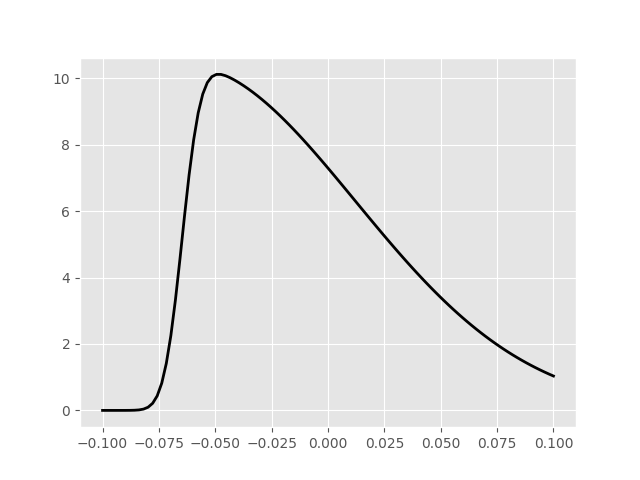

In [6]:
giorniInferenza = 30
shift = 720

r = r[(len(r)-shift-giorniInferenza):(len(r)-shift)]

print(r)

ae, loce, scalee = stats.skewnorm.fit(r)

x = np.linspace(-0.1, 0.1, 100)
p = stats.skewnorm.pdf(x, ae, loce, scalee)
plt.figure()
#plt.hist(r, bins=100, normed=True, alpha=0.6, color='g')
plt.plot(x,p,'k',linewidth=2)

funzRipartizione = stats.skewnorm.cdf(0, ae, loce, scalee)
print(1-funzRipartizione)
print(funzRipartizione)

<AxesSubplot:xlabel='Date'>

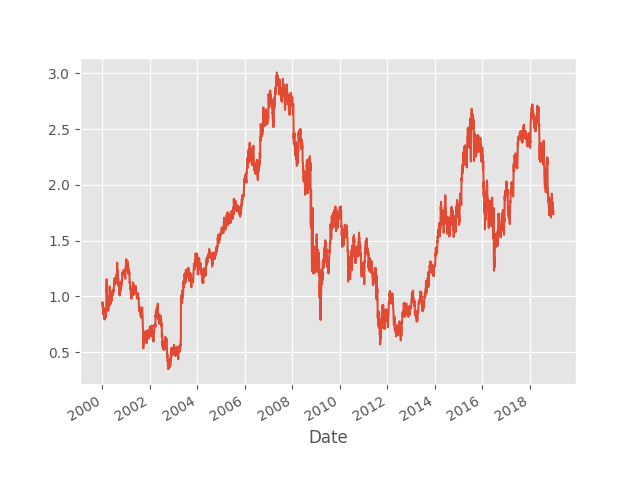

In [7]:
plt.figure();
dta['Adj Close'].plot()